In [1]:
! pip install pandas numpy pyarrow fastparquet --quiet


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd, numpy as np
from glob import glob


In [ ]:
in_path = glob('/Users/alialshaikh/Downloads/itineraries_snappy.parquet')[0]
df = pd.read_parquet(in_path,engine='pyarrow',use_threads=True)


In [1]:
import pyarrow.parquet as pq
import pandas as pd

# Path to the file
in_path = '/Users/alialshaikh/Downloads/itineraries_snappy.parquet'

# Open the Parquet file
parquet_file = pq.ParquetFile(in_path)


#### When i read the following file the ram that it uses is around 20+ GB RAM

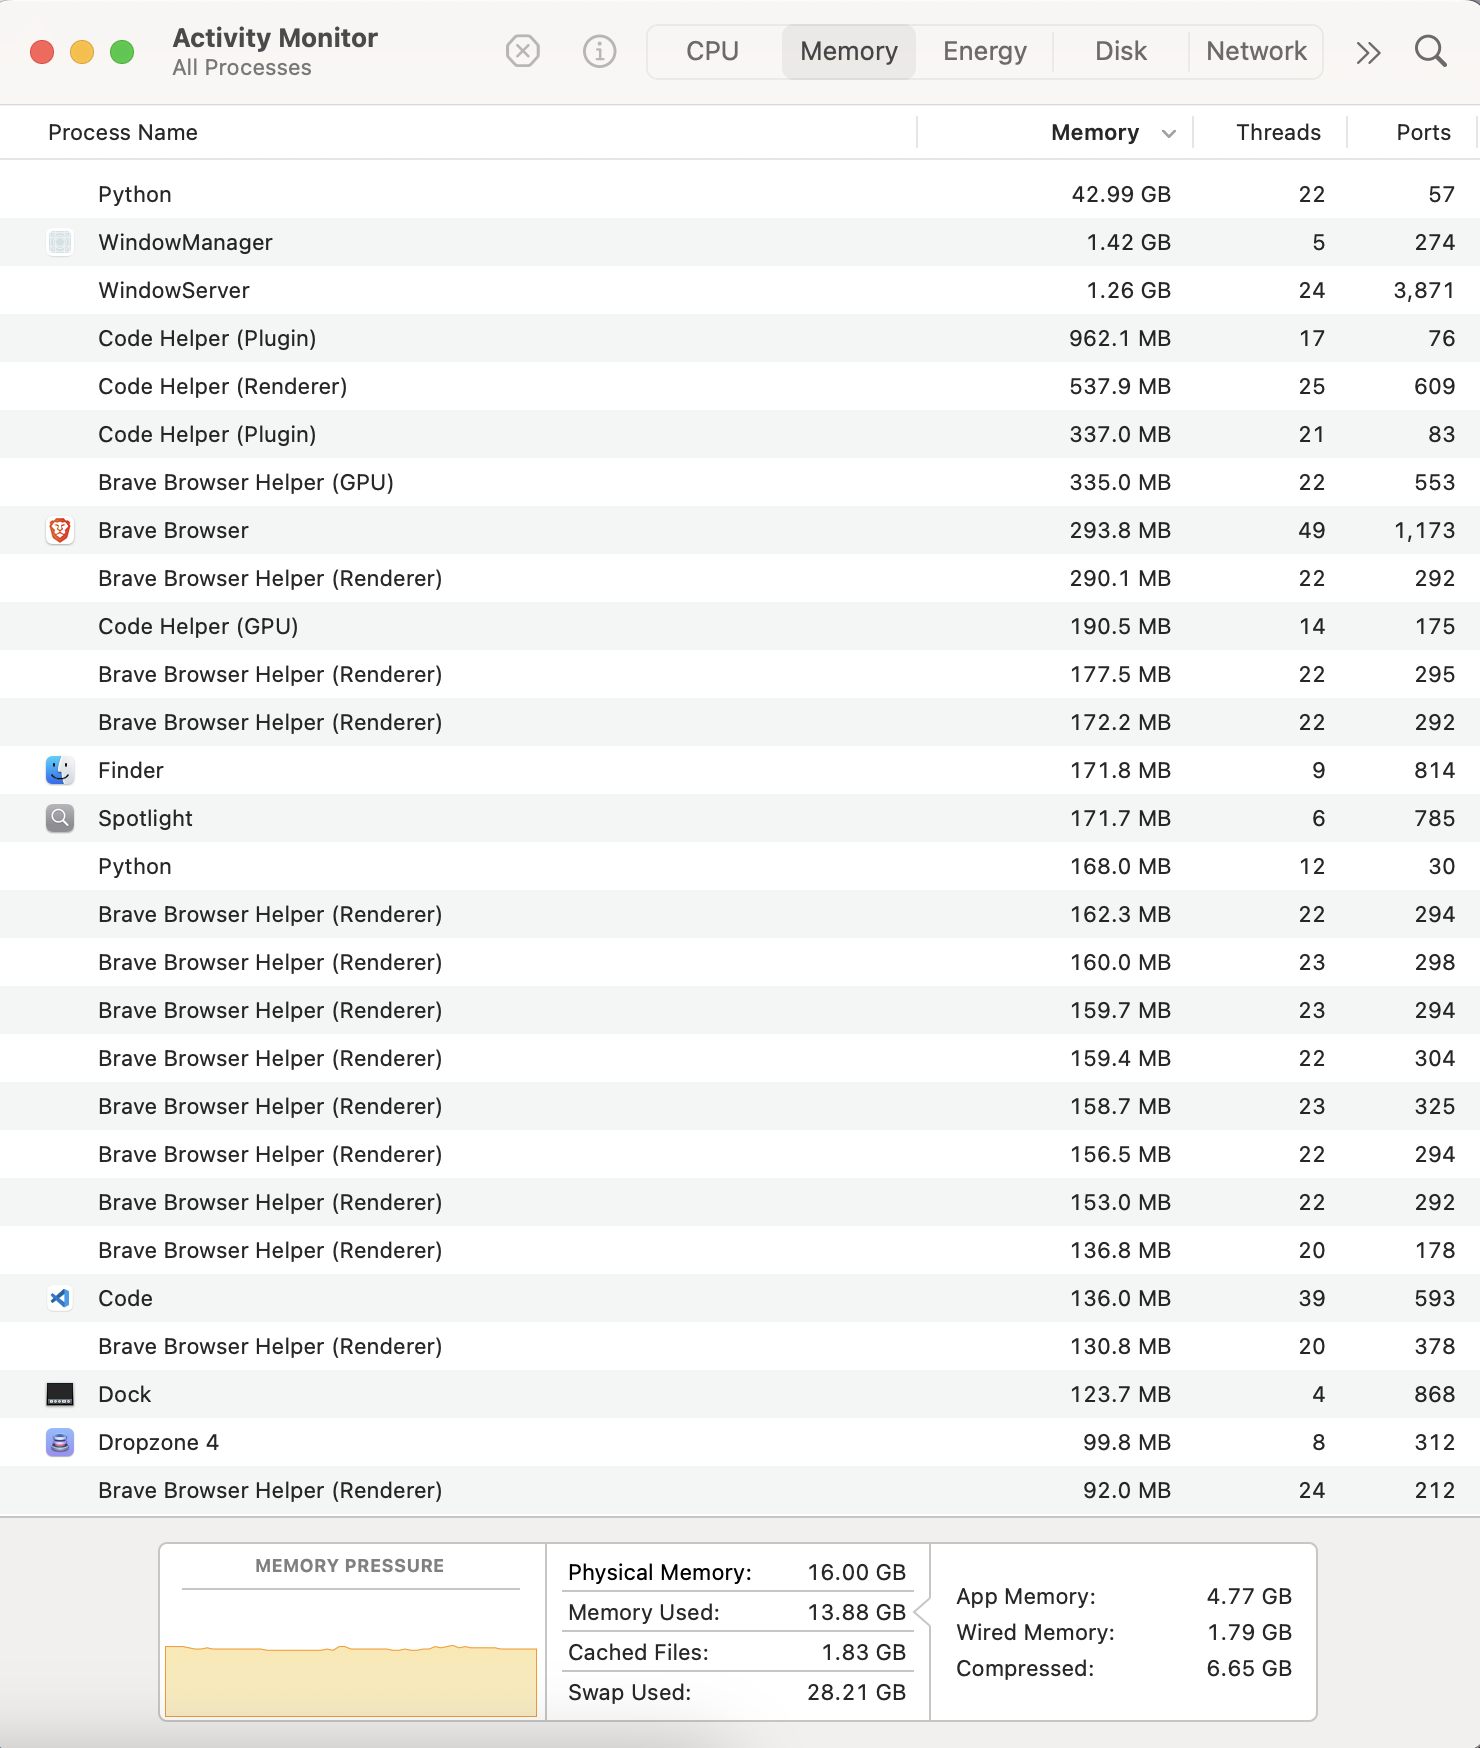

In [2]:
# Read the first 100,000 rows
table = parquet_file.read_row_groups(range(parquet_file.num_row_groups))  # Read all row groups


In [ ]:
table.num_rows
82,138,753 # actual size -- ما شاء الله

82138753

In [20]:
#5999739
table_slice = table.slice(0, 10000000)  # Slice the first 100,000 rows

In [21]:
# Convert to pandas DataFrame
df = table_slice.to_pandas()

In [22]:
df.to_csv('flight_prices.csv')

# loading the CSV file

In [ ]:
df = pd.read_csv('flight_prices.csv',nrows=2_000_000,) # load the first 2 million columns

In [7]:
import pandas as pd, numpy as np

In [102]:
df = pd.read_csv('2million-flightTickets')

In [103]:
df.iloc[:,:20]

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,True,217.67,248.60,9,947.0,1650214620,2022-04-17T12:57:00.000-04:00,1650223560,2022-04-17T15:26:00.000-04:00,BOS
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,True,217.67,248.60,4,947.0,1650191400,2022-04-17T06:30:00.000-04:00,1650200400,2022-04-17T09:00:00.000-04:00,BOS
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,True,217.67,248.60,9,947.0,1650209700,2022-04-17T11:35:00.000-04:00,1650218700,2022-04-17T14:05:00.000-04:00,BOS
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,True,217.67,248.60,8,947.0,1650218340,2022-04-17T13:59:00.000-04:00,1650227460,2022-04-17T16:31:00.000-04:00,BOS
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,True,217.67,248.60,9,947.0,1650203940,2022-04-17T09:59:00.000-04:00,1650213180,2022-04-17T12:33:00.000-04:00,BOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,4cf54fe477baef3dda572374daa8d84f,2022-04-21,2022-04-29,ATL,DTW,KA7QA0MQ,PT4H10M,0,False,False,False,528.38,591.61,6,610.0,1651230900||1651242180,2022-04-29T07:15:00.000-04:00||2022-04-29T10:2...,1651236420||1651245900,2022-04-29T08:47:00.000-04:00||2022-04-29T11:2...,CMH||DTW
1999996,2571238114ce6f22d45a393d9ede68db,2022-04-21,2022-04-29,ATL,DTW,KA7QA0MQ,PT8H42M,0,False,False,False,528.37,597.20,8,622.0,1651234200||1651258860,2022-04-29T08:10:00.000-04:00||2022-04-29T15:0...,1651237080||1651265520,2022-04-29T08:58:00.000-04:00||2022-04-29T16:5...,CHA||DTW
1999997,a57f5864c26f64cb4506f2ce7b824076,2022-04-21,2022-04-29,ATL,DTW,HA7QA0MQ,PT7H28M,0,False,False,False,714.42,797.20,9,1044.0,1651231800||1651251900,2022-04-29T07:30:00.000-04:00||2022-04-29T13:0...,1651237320||1651258680,2022-04-29T09:02:00.000-04:00||2022-04-29T14:5...,ORF||DTW
1999998,b6a005fb71cc0f76a643a0a9026b236e,2022-04-21,2022-04-29,ATL,EWR,LAA7AHBN,PT2H19M,0,True,False,True,82.79,103.60,9,762.0,1651281780,2022-04-29T21:23:00.000-04:00,1651290120,2022-04-29T23:42:00.000-04:00,EWR


In [104]:
df.iloc[:,20:]

,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,ATL,Delta,DL,Airbus A321,8940,947,coach
1,ATL,Delta,DL,Airbus A321,9000,947,coach
2,ATL,Delta,DL,Boeing 757-200,9000,947,coach
3,ATL,Delta,DL,Airbus A321,9120,947,coach
4,ATL,Delta,DL,Airbus A321,9240,947,coach
...,...,...,...,...,...,...,...
1999995,ATL||CMH,Delta||Delta,DL||DL,Boeing 737-900||Canadair Regional Jet 900,5520||3720,449||161,coach||coach
1999996,ATL||CHA,Delta||Delta,DL||DL,Boeing 717||Canadair Regional Jet,2880||6660,107||515,coach||coach
1999997,ATL||ORF,Delta||Delta,DL||DL,Airbus A320||Canadair Regional Jet 900,5520||6780,517||527,coach||coach
1999998,ATL,United,UA,Boeing 737-700,8340,762,coach


how to takle this dataset ? 
- find the null values, then clean them
- then make your analysis


In [105]:
df.isna().sum()

legId                                     0
searchDate                                0
flightDate                                0
startingAirport                           0
destinationAirport                        0
fareBasisCode                             0
travelDuration                            0
elapsedDays                               0
isBasicEconomy                            0
isRefundable                              0
isNonStop                                 0
baseFare                                  0
totalFare                                 0
seatsRemaining                            0
totalTravelDistance                  121198
segmentsDepartureTimeEpochSeconds         0
segmentsDepartureTimeRaw                  0
segmentsArrivalTimeEpochSeconds           0
segmentsArrivalTimeRaw                    0
segmentsArrivalAirportCode                0
segmentsDepartureAirportCode              0
segmentsAirlineName                       0
segmentsAirlineCode             

In [106]:
len(df['startingAirport'].unique())

16

In [107]:
df['destinationAirport'].unique()

array(['BOS', 'CLT', 'DEN', 'DFW', 'DTW', 'EWR', 'IAD', 'JFK', 'LAX',
       'LGA', 'MIA', 'OAK', 'ORD', 'PHL', 'SFO', 'ATL'], dtype=object)

In [108]:
import matplotlib.pyplot as plt

# the data as it is, it is Rightly skewed due to some outliers being streching the graphs to the right side

- what is bins ?  


```python
 plt.subplots( number of rows , number columns , figsize=(12, 5)) # --> returns to things you can manipulate, figure (fig) and axes of the figures
 ```

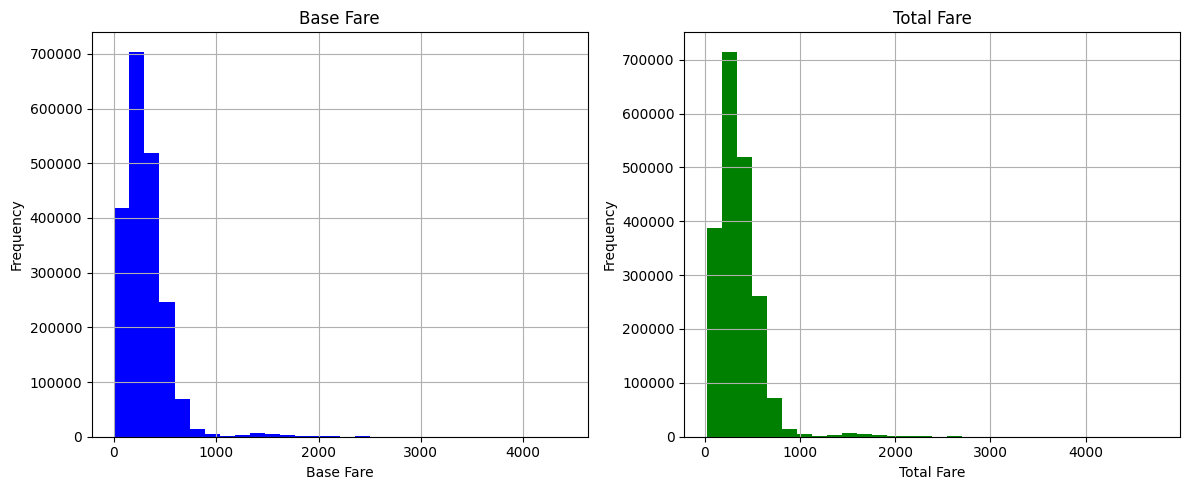

In [109]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

# Plot the histograms
df['baseFare'].hist(ax=axes[0], bins=30, color='blue')
axes[0].set_title('Base Fare')
axes[0].set_xlabel('Base Fare')
axes[0].set_ylabel('Frequency')

df['totalFare'].hist(ax=axes[1], bins=30, color='green')
axes[1].set_title('Total Fare')
axes[1].set_xlabel('Total Fare')
axes[1].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## The fares Normalized , very cool

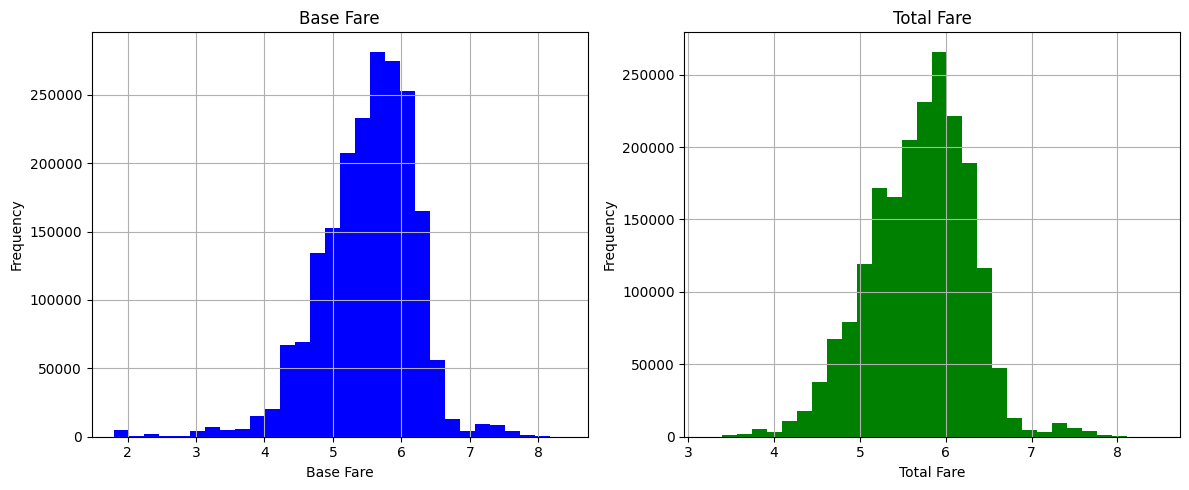

In [110]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

# Plot the histograms
np.log1p(df['baseFare']).hist(ax=axes[0], bins=30, color='blue')
axes[0].set_title('Base Fare')
axes[0].set_xlabel('Base Fare')
axes[0].set_ylabel('Frequency')

np.log1p(df['totalFare']).hist(ax=axes[1], bins=30, color='green')
axes[1].set_title('Total Fare')
axes[1].set_xlabel('Total Fare')
axes[1].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [24]:
data_dictionary = dict( legId = "An identifier for the flight.",
      searchDate= "The date (YYYY-MM-DD) on which this entry was taken from Expedia.",
      flightDate= "The date (YYYY-MM-DD) of the flight.",
      startingAirport= "Three-character IATA airport code for the initial location.",
      destinationAirport= "Three-character IATA airport code for the arrival location.",
      fareBasisCode= "The fare basis code.",
      travelDuration= "The travel duration in hours and minutes.",
      elapsedDays= "The number of elapsed days (usually 0).",
      isBasicEconomy= "Boolean for whether the ticket is for basic economy.",
      isRefundable= "Boolean for whether the ticket is refundable.",
      isNonStop=" Boolean for whether the flight is non-stop.",
      baseFare= "The price of the ticket (in USD).",
      totalFare= "The price of the ticket (in USD) including taxes and other fees.",
      seatsRemaining=" Integer for the number of seats remaining.",
      totalTravelDistance= "The total travel distance in miles. This data is sometimes missing.",
      segmentsDepartureTimeEpochSeconds= "String containing the departure time (Unix time) for each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsDepartureTimeRaw= "String containing the departure time (ISO 8601 format: YYYY-MM-DDThh:mm:ss.000±[hh]:00) for each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsArrivalTimeEpochSeconds= "String containing the arrival time (Unix time) for each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsArrivalTimeRaw= "String containing the arrival time (ISO 8601 format: YYYY-MM-DDThh:mm:ss.000±[hh]:00) for each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsArrivalAirportCode= "String containing the IATA airport code for the arrival location for each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsDepartureAirportCode= "String containing the IATA airport code for the departure location for each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsAirlineName= "String containing the name of the airline that services each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsAirlineCode= "String containing the two-letter airline code that services each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsEquipmentDescription= "String containing the type of airplane used for each leg of the trip (e.g. \"Airbus A321\" or \"Boeing 737-800\"). The entries for each of the legs are separated by '||'.",
      segmentsDurationInSeconds= "String containing the duration of the flight (in seconds) for each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsDistance= "String containing the distance traveled (in miles) for each leg of the trip. The entries for each of the legs are separated by '||'.",
      segmentsCabinCode= "String containing the cabin for each leg of the trip (e.g. \"coach\"). The entries for each of the legs are separated by '||'.")

In [25]:
data_dictionary

{'legId': 'An identifier for the flight.',
 'searchDate': 'The date (YYYY-MM-DD) on which this entry was taken from Expedia.',
 'flightDate': 'The date (YYYY-MM-DD) of the flight.',
 'startingAirport': 'Three-character IATA airport code for the initial location.',
 'destinationAirport': 'Three-character IATA airport code for the arrival location.',
 'fareBasisCode': 'The fare basis code.',
 'travelDuration': 'The travel duration in hours and minutes.',
 'elapsedDays': 'The number of elapsed days (usually 0).',
 'isBasicEconomy': 'Boolean for whether the ticket is for basic economy.',
 'isRefundable': 'Boolean for whether the ticket is refundable.',
 'isNonStop': ' Boolean for whether the flight is non-stop.',
 'baseFare': 'The price of the ticket (in USD).',
 'totalFare': 'The price of the ticket (in USD) including taxes and other fees.',
 'seatsRemaining': ' Integer for the number of seats remaining.',
 'totalTravelDistance': 'The total travel distance in miles. This data is sometimes

In [113]:
df['segmentsDepartureTimeEpochSeconds'][1999995]

'1651230900||1651242180'

In [114]:
df['segmentsDepartureTimeRaw'][1999995]

'2022-04-29T07:15:00.000-04:00||2022-04-29T10:23:00.000-04:00'

In [115]:
df['segmentsDepartureAirportCode'][1999995],df['segmentsArrivalAirportCode'][1999995]

('ATL||CMH', 'CMH||DTW')

In [116]:
df.isna().sum()

legId                                     0
searchDate                                0
flightDate                                0
startingAirport                           0
destinationAirport                        0
fareBasisCode                             0
travelDuration                            0
elapsedDays                               0
isBasicEconomy                            0
isRefundable                              0
isNonStop                                 0
baseFare                                  0
totalFare                                 0
seatsRemaining                            0
totalTravelDistance                  121198
segmentsDepartureTimeEpochSeconds         0
segmentsDepartureTimeRaw                  0
segmentsArrivalTimeEpochSeconds           0
segmentsArrivalTimeRaw                    0
segmentsArrivalAirportCode                0
segmentsDepartureAirportCode              0
segmentsAirlineName                       0
segmentsAirlineCode             

#### drop the null values

In [117]:
df.dropna(subset=['segmentsEquipmentDescription', 'segmentsDistance'], inplace=True)

#### impute the `totalTravelDistance` column using `segmentsDistance`

In [118]:
df.iloc[:,[14,25,19,20,21,22,23,24,26,]]

,totalTravelDistance,segmentsDistance,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsCabinCode
0,947.0,947,BOS,ATL,Delta,DL,Airbus A321,8940,coach
1,947.0,947,BOS,ATL,Delta,DL,Airbus A321,9000,coach
2,947.0,947,BOS,ATL,Delta,DL,Boeing 757-200,9000,coach
3,947.0,947,BOS,ATL,Delta,DL,Airbus A321,9120,coach
4,947.0,947,BOS,ATL,Delta,DL,Airbus A321,9240,coach
...,...,...,...,...,...,...,...,...,...
1999995,610.0,449||161,CMH||DTW,ATL||CMH,Delta||Delta,DL||DL,Boeing 737-900||Canadair Regional Jet 900,5520||3720,coach||coach
1999996,622.0,107||515,CHA||DTW,ATL||CHA,Delta||Delta,DL||DL,Boeing 717||Canadair Regional Jet,2880||6660,coach||coach
1999997,1044.0,517||527,ORF||DTW,ATL||ORF,Delta||Delta,DL||DL,Airbus A320||Canadair Regional Jet 900,5520||6780,coach||coach
1999998,762.0,762,EWR,ATL,United,UA,Boeing 737-700,8340,coach


In [119]:
segment = df['segmentsDistance'][1999995].split('||') 

In [ ]:
def calculate_total_traveled_distance(segment_distance_list):
  vals = segment_distance_list.split('||')
  # i.isdigit() is a str method in python
  valid_values = [ i for i in vals if i and i.isdigit()]
  return sum(map(int,valid_values))

In [121]:
df['total_distance'] = df['segmentsDistance'].apply(calculate_total_traveled_distance) #.apply() runs in C-optimized pandas code. inshort python is slow, C is very fast

In [122]:
df.loc[:,['totalTravelDistance','total_distance']][df['totalTravelDistance'].isnull()]

,totalTravelDistance,total_distance
15,NaN,0
25,NaN,0
61,NaN,0
91,NaN,0
92,NaN,0
...,...,...
1999934,NaN,0
1999935,NaN,0
1999947,NaN,0
1999948,NaN,0


In [123]:
f1  = df['total_distance'] == 0
df[f1].shape

(105861, 28)

now i understand, those null values are zero's that's why they are null,
i will keep the 0's for now, and i will get rid of the totalTravelDistance

In [124]:
df = df.drop(['totalTravelDistance'], axis=1)

In [125]:
df.isna().sum()

legId                                0
searchDate                           0
flightDate                           0
startingAirport                      0
destinationAirport                   0
fareBasisCode                        0
travelDuration                       0
elapsedDays                          0
isBasicEconomy                       0
isRefundable                         0
isNonStop                            0
baseFare                             0
totalFare                            0
seatsRemaining                       0
segmentsDepartureTimeEpochSeconds    0
segmentsDepartureTimeRaw             0
segmentsArrivalTimeEpochSeconds      0
segmentsArrivalTimeRaw               0
segmentsArrivalAirportCode           0
segmentsDepartureAirportCode         0
segmentsAirlineName                  0
segmentsAirlineCode                  0
segmentsEquipmentDescription         0
segmentsDurationInSeconds            0
segmentsDistance                     0
segmentsCabinCode        

In [126]:
# df.rename(columns={'old_column_name': 'new_column_name'})

df = df.rename(columns={'total_distance': 'totalTravelDistance'})

In [127]:
df.iloc[:,18:]

,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,totalTravelDistance
0,BOS,ATL,Delta,DL,Airbus A321,8940,947,coach,947
1,BOS,ATL,Delta,DL,Airbus A321,9000,947,coach,947
2,BOS,ATL,Delta,DL,Boeing 757-200,9000,947,coach,947
3,BOS,ATL,Delta,DL,Airbus A321,9120,947,coach,947
4,BOS,ATL,Delta,DL,Airbus A321,9240,947,coach,947
...,...,...,...,...,...,...,...,...,...
1999995,CMH||DTW,ATL||CMH,Delta||Delta,DL||DL,Boeing 737-900||Canadair Regional Jet 900,5520||3720,449||161,coach||coach,610
1999996,CHA||DTW,ATL||CHA,Delta||Delta,DL||DL,Boeing 717||Canadair Regional Jet,2880||6660,107||515,coach||coach,622
1999997,ORF||DTW,ATL||ORF,Delta||Delta,DL||DL,Airbus A320||Canadair Regional Jet 900,5520||6780,517||527,coach||coach,1044
1999998,EWR,ATL,United,UA,Boeing 737-700,8340,762,coach,762


In [128]:
df.loc[:,['segmentsDistance','totalTravelDistance','segmentsDepartureAirportCode','segmentsArrivalAirportCode']][df['totalTravelDistance']==0] # now i understand what is happening

,segmentsDistance,totalTravelDistance,segmentsDepartureAirportCode,segmentsArrivalAirportCode
15,None||None,0,ATL||FLL,FLL||BOS
25,None||None,0,ATL||FLL,FLL||BOS
61,None||None,0,ATL||FLL,FLL||DEN
91,None||None,0,ATL||FLL,FLL||DEN
92,None||None,0,ATL||FLL,FLL||DEN
...,...,...,...,...
1999934,None||None,0,ATL||FLL,FLL||DFW
1999935,None||None,0,ATL||FLL,FLL||DFW
1999947,None||None,0,ATL||FLL,FLL||DTW
1999948,None||None,0,ATL||FLL,FLL||DTW


can we impute the travel distance for these ? `I think it is possible`

is there tickets that cost < 0 ?

In [129]:
df.columns

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'fareBasisCode', 'travelDuration', 'elapsedDays',
       'isBasicEconomy', 'isRefundable', 'isNonStop', 'baseFare', 'totalFare',
       'seatsRemaining', 'segmentsDepartureTimeEpochSeconds',
       'segmentsDepartureTimeRaw', 'segmentsArrivalTimeEpochSeconds',
       'segmentsArrivalTimeRaw', 'segmentsArrivalAirportCode',
       'segmentsDepartureAirportCode', 'segmentsAirlineName',
       'segmentsAirlineCode', 'segmentsEquipmentDescription',
       'segmentsDurationInSeconds', 'segmentsDistance', 'segmentsCabinCode',
       'totalTravelDistance'],
      dtype='object')

## POSSIBLE ANSWER

In [130]:
df.loc[:,['baseFare','totalFare']][(df['baseFare'] >= 5) & (df['baseFare'] <= 10)].shape[0]

2276

There is 2276 tickets which had a baseFare that is less than 10 dollars and greater than 5 dollars

but what about the total Fare ? 

In [131]:
df.loc[:,['baseFare','totalFare','isRefundable','segmentsArrivalAirportCode','segmentsDepartureAirportCode']][(df['totalFare'] <= 23.97 )].nunique()

baseFare                        1
totalFare                       1
isRefundable                    1
segmentsArrivalAirportCode      2
segmentsDepartureAirportCode    2
dtype: int64

from this line of code we can understand that the minmum price of the `totalFare` column, occurs 23 times in the dataset, and from the dataset we can see that the departure airport and the arrival airport contains only 2 values which is : `SFO`,`ONT`; which means the traveler is going either from San Francisco International Airport (SFO) to Ontario International Airport (ONT) or vice versa (ONT to SFO).

In [132]:
float(df['baseFare'].min()), float(df['baseFare'].max())

(5.1, 4407.44)

In [133]:
float(df['totalFare'].min()), float(df['totalFare'].max())


(23.97, 4752.6)

we can see here that: 
-  the minmum fare price without taxes is `$ 5.1`, taxes applied = `$ 23.97`
-  the maximum fare price without taxes is `$ 4407.1`, taxes applied = `$ 4752.6`


### Analysis

In [134]:
# top departure and arrival airports: 

df.columns

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'fareBasisCode', 'travelDuration', 'elapsedDays',
       'isBasicEconomy', 'isRefundable', 'isNonStop', 'baseFare', 'totalFare',
       'seatsRemaining', 'segmentsDepartureTimeEpochSeconds',
       'segmentsDepartureTimeRaw', 'segmentsArrivalTimeEpochSeconds',
       'segmentsArrivalTimeRaw', 'segmentsArrivalAirportCode',
       'segmentsDepartureAirportCode', 'segmentsAirlineName',
       'segmentsAirlineCode', 'segmentsEquipmentDescription',
       'segmentsDurationInSeconds', 'segmentsDistance', 'segmentsCabinCode',
       'totalTravelDistance'],
      dtype='object')

## POSSIBLE ANSWER

#### Count the occurences of airports -- 1st question

- what is the most used airport for arrivals ? 
- what is the most used airport for departures ? 
- what is the most used airport for both cases ? 

In [135]:
arrival_airports = df['segmentsArrivalAirportCode'].str.split(r'\|\|').explode()
arrival_airport_count = arrival_airports.value_counts()

In [136]:
departure_airports = df['segmentsDepartureAirportCode'].str.split(r'\|\|').explode()
departure_airport_count = departure_airports.value_counts()

In [137]:
airport_count = pd.concat([arrival_airport_count,departure_airport_count], axis=1)
airport_count.columns = ['arrival_airport_count','departure_airport_count']

In [138]:
airport_count['total_arrival_departure'] = airport_count['arrival_airport_count'] +  airport_count['departure_airport_count']

In [139]:
airport_count.head(10)

,arrival_airport_count,departure_airport_count,total_arrival_departure
ORD,289223,287757,576980
ATL,269600,262723,532323
CLT,232016,227715,459731
LAX,221879,225488,447367
EWR,194117,193932,388049
LGA,193602,195116,388718
DFW,191608,188228,379836
BOS,186287,198158,384445
DEN,171920,164958,336878
JFK,157890,156329,314219


## POSSIBLE ANSWER

#### Count the number of multi-leg flights
- `how many multi-leg flights are there in the dataset ? `
- what is the most connection ? 
- how many travelers use a multi-leg flight ? 
- are multi-leg flights cheaper ? 
- what kind of connections for the full flights are used ? 

#### Question: What is the count of the multi-leg flights ? 

In [140]:
# count the number of multi-leg flights
filter = df['segmentsArrivalAirportCode'].str.contains(r'\|\|', na=False) # what is na= ? 

In [141]:
number_multi_leg_flights = len(df[filter][['segmentsArrivalAirportCode','segmentsDepartureAirportCode']]) # output = 1,430,064 rows

In [142]:
df[filter][['segmentsArrivalAirportCode','segmentsDepartureAirportCode']]

,segmentsArrivalAirportCode,segmentsDepartureAirportCode
6,CLT||BOS,ATL||CLT
7,CLT||BOS,ATL||CLT
8,CLT||BOS,ATL||CLT
9,CLT||BOS,ATL||CLT
10,IAD||BOS,ATL||IAD
...,...,...
1999994,CLE||DTW,ATL||CLE
1999995,CMH||DTW,ATL||CMH
1999996,CHA||DTW,ATL||CHA
1999997,ORF||DTW,ATL||ORF


In [143]:
print(f' The number of multi-leg flights currently {number_multi_leg_flights}')

 The number of multi-leg flights currently 1430064


### Identify Common Connections in Multi-Leg Flights

- by the common connection i am searching here for something like: `LGA --> ORD`
- So by a common connection we are refering for something like departure:
1. Departure Column -> `ATL||CMH`	
2. Arrival Column -> `CMH||DTW`

what i am trying to see is from the Departure Column `ATL` and from the Arrival Column `CMH` to see which connections from 1 place to another place is being used the most.

In [144]:
df[['segmentsDepartureAirportCode','segmentsArrivalAirportCode']]

,segmentsDepartureAirportCode,segmentsArrivalAirportCode
0,ATL,BOS
1,ATL,BOS
2,ATL,BOS
3,ATL,BOS
4,ATL,BOS
...,...,...
1999995,ATL||CMH,CMH||DTW
1999996,ATL||CHA,CHA||DTW
1999997,ATL||ORF,ORF||DTW
1999998,ATL,EWR


In [145]:
# Extract the first departure and arrival airport codes
# taking the first column from the list as explained above
df['departure'] = df['segmentsDepartureAirportCode'].str.split(r'\|\|', expand=True)[0] 
df['arrival'] = df['segmentsArrivalAirportCode'].str.split(r'\|\|', expand=True)[0] # the 1st item in the 'list' <- easier to think of it as a list



In [146]:
# Create a "route" column
df['route'] = df['departure'] + "->" + df['arrival']

In [ ]:
# 'value_counts()' returns a dataframe with the column name and the count of each distinct element in the column

df['route'].value_counts().reset_index()

,route,count
0,LGA->ORD,31230
1,OAK->LAX,26207
2,BOS->EWR,24519
3,MIA->ATL,24067
4,PHL->ORD,23474
...,...,...
1041,CLT->GRR,1
1042,CLT->ABE,1
1043,SFO->BNA,1
1044,EWR->STL,1


<Axes: ylabel='route'>

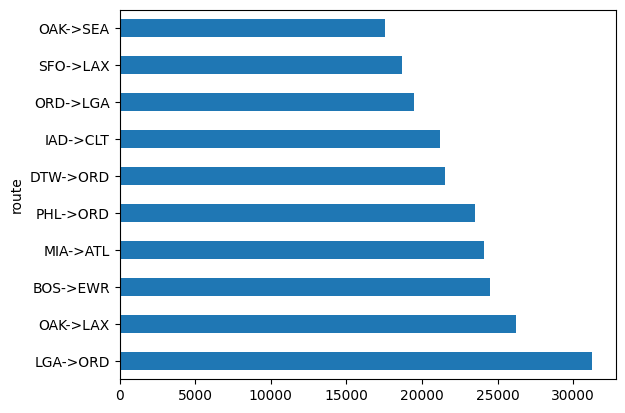

In [47]:
df['route'].value_counts().head(10).plot(kind='barh',x='route',y='count')


## THE MOST COMMON CONNECTION IS LGA->ORD WHICH IS ?

`LaGuardia Airport (LGA) in New York City to O’Hare International Airport (ORD) in Chicago.`

In [148]:
# Count occurrences of each route
route_counts = df['route'].value_counts().reset_index()
route_counts.columns = ['Route', 'Count']

In [149]:
# Display the most common routes
route_counts.head(10)  # Top 10 most common routes

,Route,Count
0,LGA->ORD,31230
1,OAK->LAX,26207
2,BOS->EWR,24519
3,MIA->ATL,24067
4,PHL->ORD,23474
5,DTW->ORD,21503
6,IAD->CLT,21170
7,ORD->LGA,19463
8,SFO->LAX,18683
9,OAK->SEA,17523


these are the most popular route as start to departure, but it may be just a transit

i would like to know the most popular route as start to finish ☕️😆

### Question: what is the most used full connection as in `departure to destination`? 

sub-questions: 
- how many travelers use a multi-leg flight ? 
- are multi-leg flights cheaper ? 
- what kind of connections for the full flights are used ? 

In [51]:
# Split departure and arrival segments
departure_segments = df['segmentsDepartureAirportCode'].str.split(r'\|\|', expand=True)
arrival_segments = df['segmentsArrivalAirportCode'].str.split(r'\|\|', expand=True)

In [151]:
# Fill NaN with empty strings
departure_segments = departure_segments.fillna('')
arrival_segments = arrival_segments.fillna('')

departure_segments


,0,1,2,3
0,ATL,,,
1,ATL,,,
2,ATL,,,
3,ATL,,,
4,ATL,,,
...,...,...,...,...
1999995,ATL,CMH,,
1999996,ATL,CHA,,
1999997,ATL,ORF,,
1999998,ATL,,,


In [58]:
dp = departure_segments.apply(lambda row: ' -> '.join(row[row != '']), axis=1)

In [59]:
ap = arrival_segments.apply(lambda row: ' -> '.join(row[row != '']), axis=1)

In [152]:
# Merge departure and arrival segments, ensuring empty segments are removed
df['full_route'] =  dp + " -> " + ap

In [153]:
# Clean up any trailing " -> " that appears if arrival part is empty
df['full_route'] = df['full_route'].str.rstrip(' -> ')


In [48]:
route_counts = df['full_route'].value_counts().reset_index()
route_counts.head(10)

,full_route,count
0,ORD -> LGA,10190
1,LGA -> ORD,10082
2,LGA -> BOS,7270
3,JFK -> LAX,7177
4,BOS -> LGA,7170
5,DFW -> LGA,6385
6,LAX -> JFK,6363
7,SFO -> LAX,6345
8,LGA -> DFW,6334
9,JFK -> MIA,6332


Now we have the count of each full route for all the airplane tickets, where we can see the `start` and the `end` destination. 

To see the results the build up of our results we can combine our explartory analysis into 1 dataframe

In [73]:
df['full_route'].tail()

1952072    ATL -> CMH -> CMH -> DTW
1952073    ATL -> CHA -> CHA -> DTW
1952074    ATL -> ORF -> ORF -> DTW
1952075                  ATL -> EWR
1952076    ATL -> CLT -> CLT -> EWR
Name: full_route, dtype: object

In [13]:
# i want to catch the flights where the departure segment contains something like 
# Filter rows where column 0 contains at least two "->" separators
# three_or_more_departures_df = df[df['full_route'].str.contains(r'[^ ]+ -> [^ ]+ -> ', regex=True)]
three_or_more_departures_df = df[df['segmentsDepartureAirportCode'].str.contains(r"^[A-Z]{3}\|\|[A-Z]{3}\|\|", regex=True)]

print(f' Tickets with at least 3 departures          {three_or_more_departures_df.shape[0]}')
print(f' The Size of the original dataframe          {df.shape[0]}')




 Tickets with at least 3 departures          144024
 The Size of the original dataframe          1952077


In [14]:
df.startingAirport.unique()

array(['ATL', 'BOS', 'CLT', 'DEN', 'DFW', 'DTW', 'EWR', 'IAD', 'JFK',
       'LAX', 'LGA', 'MIA', 'OAK', 'ORD', 'PHL', 'SFO'], dtype=object)

In [15]:
df.iloc[:,-15:]

,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,totalTravelDistance,departure,arrival,route,full_route
0,1650223560,2022-04-17T15:26:00.000-04:00,BOS,ATL,D||e||l||t||a,DL,Airbus A321,8940,947,coach,947,ATL,BOS,ATL->BOS,ATL -> BOS
1,1650200400,2022-04-17T09:00:00.000-04:00,BOS,ATL,D||e||l||t||a,DL,Airbus A321,9000,947,coach,947,ATL,BOS,ATL->BOS,ATL -> BOS
2,1650218700,2022-04-17T14:05:00.000-04:00,BOS,ATL,D||e||l||t||a,DL,Boeing 757-200,9000,947,coach,947,ATL,BOS,ATL->BOS,ATL -> BOS
3,1650227460,2022-04-17T16:31:00.000-04:00,BOS,ATL,D||e||l||t||a,DL,Airbus A321,9120,947,coach,947,ATL,BOS,ATL->BOS,ATL -> BOS
4,1650213180,2022-04-17T12:33:00.000-04:00,BOS,ATL,D||e||l||t||a,DL,Airbus A321,9240,947,coach,947,ATL,BOS,ATL->BOS,ATL -> BOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952072,1651236420||1651245900,2022-04-29T08:47:00.000-04:00||2022-04-29T11:2...,CMH||DTW,ATL||CMH,D||e||l||t||a||||||||D||e||l||t||a,DL||DL,Boeing 737-900||Canadair Regional Jet 900,5520||3720,449||161,coach||coach,610,ATL,CMH,ATL->CMH,ATL -> CMH -> CMH -> DTW
1952073,1651237080||1651265520,2022-04-29T08:58:00.000-04:00||2022-04-29T16:5...,CHA||DTW,ATL||CHA,D||e||l||t||a||||||||D||e||l||t||a,DL||DL,Boeing 717||Canadair Regional Jet,2880||6660,107||515,coach||coach,622,ATL,CHA,ATL->CHA,ATL -> CHA -> CHA -> DTW
1952074,1651237320||1651258680,2022-04-29T09:02:00.000-04:00||2022-04-29T14:5...,ORF||DTW,ATL||ORF,D||e||l||t||a||||||||D||e||l||t||a,DL||DL,Airbus A320||Canadair Regional Jet 900,5520||6780,517||527,coach||coach,1044,ATL,ORF,ATL->ORF,ATL -> ORF -> ORF -> DTW
1952075,1651290120,2022-04-29T23:42:00.000-04:00,EWR,ATL,U||n||i||t||e||d,UA,Boeing 737-700,8340,762,coach,762,ATL,EWR,ATL->EWR,ATL -> EWR


In [16]:
arrival_airports = 'segmentsArrivalAirportCode'	
departure_airports = 'segmentsDepartureAirportCode'

# i want tickets which exactly have 2 departures
two_departure_df = df[
    df[departure_airports].str.contains(r"^[A-Z]{3}\|\|[A-Z]{3}$", regex=True)
]

In [17]:
# i want tickets which exactly have 1 departure
nonStop_tickets = df[
    df[departure_airports].str.contains(r"^[A-Z]{3}$", regex=True)
]

In [18]:
two_departure_df.shape[0],three_or_more_departures_df.shape[0],nonStop_tickets.shape[0],df.shape[0]

(1286040, 144024, 522013, 1952077)

In [19]:
df.columns

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'fareBasisCode', 'travelDuration', 'elapsedDays',
       'isBasicEconomy', 'isRefundable', 'isNonStop', 'baseFare', 'totalFare',
       'seatsRemaining', 'segmentsDepartureTimeEpochSeconds',
       'segmentsDepartureTimeRaw', 'segmentsArrivalTimeEpochSeconds',
       'segmentsArrivalTimeRaw', 'segmentsArrivalAirportCode',
       'segmentsDepartureAirportCode', 'segmentsAirlineName',
       'segmentsAirlineCode', 'segmentsEquipmentDescription',
       'segmentsDurationInSeconds', 'segmentsDistance', 'segmentsCabinCode',
       'totalTravelDistance', 'departure', 'arrival', 'route', 'full_route'],
      dtype='object')

In [20]:

nonStop_tickets.shape[0]+ two_departure_df.shape[0] + three_or_more_departures_df.shape[0] == df.shape[0] # correct values, no df contains data from others. so all are pure correct 😍

True

<Axes: >

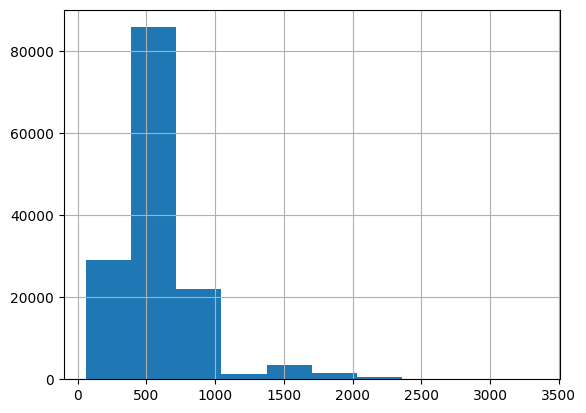

In [21]:
three_or_more_departures_df.totalFare.hist()

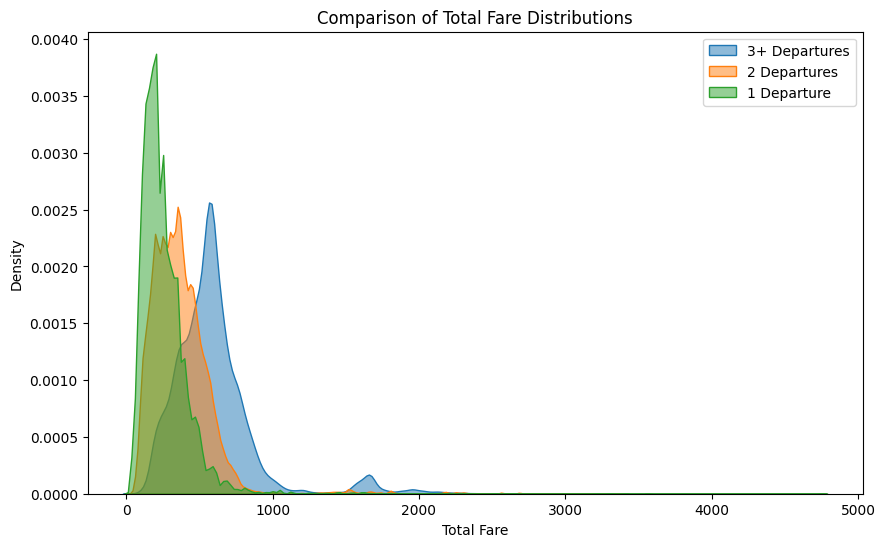

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(three_or_more_departures_df.totalFare, label='3+ Departures', fill=True, alpha=0.5)
sns.kdeplot(two_departure_df.totalFare, label='2 Departures', fill=True, alpha=0.5)
sns.kdeplot(nonStop_tickets.totalFare, label='1 Departure', fill=True, alpha=0.5)

plt.xlabel('Total Fare')
plt.ylabel('Density')
plt.title('Comparison of Total Fare Distributions')
plt.legend()
plt.show()

 very cool graph, it is working nicely



 - the green part shows that the 1 departure tickets are cheaper and `most people prefer them`
 - the orange part shows that the 2 departure tickets are still preferred, they are a little bit pricier than the 1 departure, but it still `people prefer them`



 this graph is basically not showing the raw data exactly, they are being normalized (using windows - these windows can be using different methods such as {median, min, max, mean}) or just a simple method that is like dividing the `count/total count`.

histograms are more accurate because we can play with the bins which help us get more insights much easier and faster

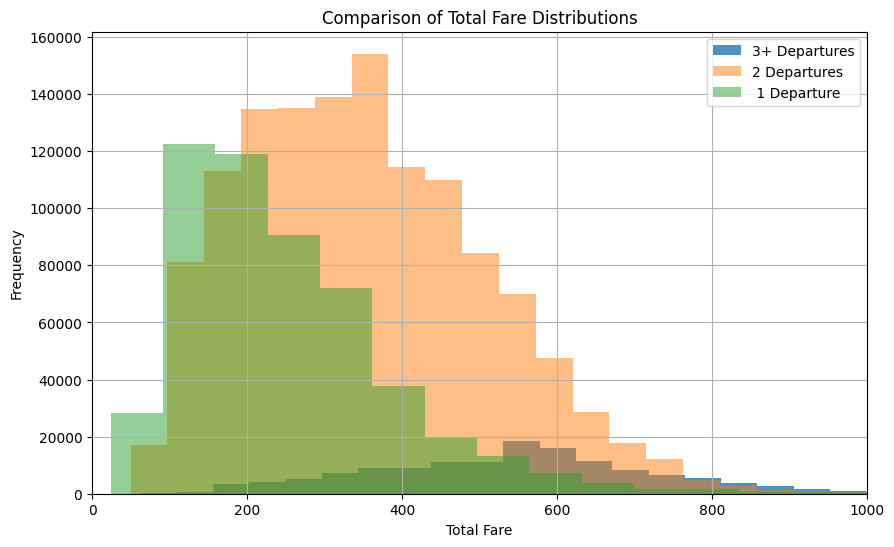

In [23]:
# Plot histograms together
plt.figure(figsize=(10, 6))
three_or_more_departures_df.totalFare.hist(alpha=0.8, label='3+ Departures', bins=70)
two_departure_df.totalFare.hist(alpha=0.5, label='2 Departures', bins=70)
nonStop_tickets.totalFare.hist(alpha=0.5, label=' 1 Departure', bins=70)


# Add labels and title
plt.xlabel('Total Fare')
plt.ylabel('Frequency')
plt.title('Comparison of Total Fare Distributions')
plt.xlim((0,1000))
plt.legend()

# Show the plot
plt.show()

 very cool graph, it is working nicely



 - the green part shows that the 1 departure tickets are cheaper and `most people prefer them`
 - the orange part shows that the 2 departure tickets are still preferred, they are a little bit pricier than the 1 departure, but it still `people prefer them`


#### Just for curiocity purposes, trying to count the number of flight tickets which contains at least 3 departures

## possible answer 

#### Now We will answer the question everyone is waiting for, which is: 
- ` does having more departures or layovers makes the ticket cheaper ? `

<Axes: >

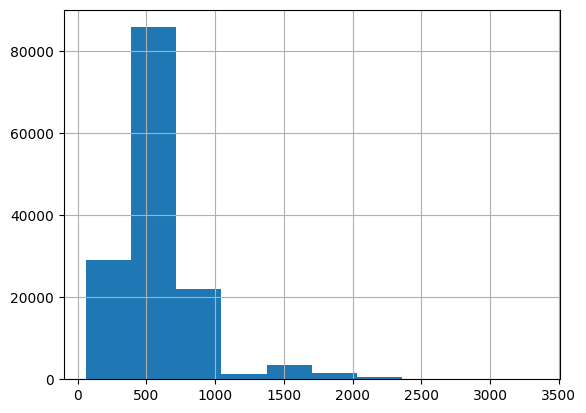

In [110]:
three_or_more_departures_df['totalFare'].hist()

how shall i tackle this challange ? 
- i have tickets where we have at least 3 departures 
- let's get tickets with 2 departures exactly
- let's get tickets with 1 departures exactly
- let's compare them, but how can we compare these 2 filtered dataframes by the total fare ?
- shall we take the sum of the total fare? shall we take the average of the fare ? shall we take the std ? shall we take the variance ? 
- we'll see

In [111]:
float(df.totalFare.min()), float(df.totalFare.max())

(23.97, 4752.6)

In [112]:
float(nonStop_tickets.totalFare.min()),float(nonStop_tickets.totalFare.max())

(23.97, 4752.6)

In [113]:
float(two_departure_df.totalFare.min()),float(two_departure_df.totalFare.max())

(49.69, 3376.6)

In [114]:
float(three_or_more_departures_df.totalFare.min()),float(three_or_more_departures_df.totalFare.max())

(62.38, 3341.09)

what can we learn from the max and the min here ? 
- the max values suggest our first intiuition which is as the number of stops increase, the price gets lower and we can sense this by looking at the maximum value of each filter we used
the min tells us a different story:

<li> for MIN prices we can see the following:
  <ul> 
    <li> one-way-tickets min : 23.97</li>
    <li> two-way-tickets min : 49.69</li>
    <li> at least three-way-tickets min : 62.38 </li>
  </ul>     
</li>

`CONCLUSION: for short travels in terms of distance, travel one way`

<li> for MAX prices we can see the following:
  <ul> 
    <li> one-way-tickets MAX : 4752.6</li>
    <li> two-way-tickets MAX : 3376.6</li>
    <li> at least three-way-tickets MAX : 3341.09 </li>
  </ul>
</li>

`CONCLUSION: for long travels in terms of distance, travel three way - considering other factors equal -- ceteris paribus`




In [166]:
two_departure_df

,DepartureAirport,ArrivalAirport,DepartureFullPath,ArrivalFullPath,FullRoute,totalFare,totalTravelDistance,travelDuration
6,ATL||CLT,CLT||BOS,ATL -> CLT,CLT -> BOS,ATL -> CLT -> CLT -> BOS,251.10,956,PT4H12M
7,ATL||CLT,CLT||BOS,ATL -> CLT,CLT -> BOS,ATL -> CLT -> CLT -> BOS,251.10,956,PT5H18M
8,ATL||CLT,CLT||BOS,ATL -> CLT,CLT -> BOS,ATL -> CLT -> CLT -> BOS,251.10,956,PT5H32M
9,ATL||CLT,CLT||BOS,ATL -> CLT,CLT -> BOS,ATL -> CLT -> CLT -> BOS,251.10,956,PT6H38M
10,ATL||IAD,IAD||BOS,ATL -> IAD,IAD -> BOS,ATL -> IAD -> IAD -> BOS,252.60,947,PT4H46M
...,...,...,...,...,...,...,...,...
1999994,ATL||CLE,CLE||DTW,ATL -> CLE,CLE -> DTW,ATL -> CLE -> CLE -> DTW,541.60,649,PT3H38M
1999995,ATL||CMH,CMH||DTW,ATL -> CMH,CMH -> DTW,ATL -> CMH -> CMH -> DTW,591.61,610,PT4H10M
1999996,ATL||CHA,CHA||DTW,ATL -> CHA,CHA -> DTW,ATL -> CHA -> CHA -> DTW,597.20,622,PT8H42M
1999997,ATL||ORF,ORF||DTW,ATL -> ORF,ORF -> DTW,ATL -> ORF -> ORF -> DTW,797.20,1044,PT7H28M


In [167]:
min_value = nonStop_tickets.totalFare.min()
min_filter = nonStop_tickets['totalFare'] <= min_value
nonStop_tickets[min_filter]

,DepartureAirport,ArrivalAirport,DepartureFullPath,ArrivalFullPath,FullRoute,totalFare,totalTravelDistance,travelDuration
246863,ONT,SFO,ONT,SFO,ONT -> SFO,23.97,351,PT1H22M
250154,SFO,ONT,SFO,ONT,SFO -> ONT,23.97,351,PT1H27M
282530,ONT,SFO,ONT,SFO,ONT -> SFO,23.97,351,PT1H23M
285959,SFO,ONT,SFO,ONT,SFO -> ONT,23.97,351,PT1H21M
355299,ONT,SFO,ONT,SFO,ONT -> SFO,23.97,351,PT1H24M
358896,SFO,ONT,SFO,ONT,SFO -> ONT,23.97,351,PT1H27M
476983,ONT,SFO,ONT,SFO,ONT -> SFO,23.97,351,PT1H22M
480015,SFO,ONT,SFO,ONT,SFO -> ONT,23.97,351,PT1H23M
777738,ONT,SFO,ONT,SFO,ONT -> SFO,23.97,351,PT1H22M
781022,SFO,ONT,SFO,ONT,SFO -> ONT,23.97,351,PT1H27M


In [168]:
min_value = two_departure_df.totalFare.min()
min_filter = two_departure_df['totalFare'] <= min_value
two_departure_df[min_filter]

,DepartureAirport,ArrivalAirport,DepartureFullPath,ArrivalFullPath,FullRoute,totalFare,totalTravelDistance,travelDuration
222873,DEN||LAS,LAS||LAX,DEN -> LAS,LAS -> LAX,DEN -> LAS -> LAS -> LAX,49.69,0,PT3H58M
753756,DEN||LAS,LAS||LAX,DEN -> LAS,LAS -> LAX,DEN -> LAS -> LAS -> LAX,49.69,0,PT3H58M
1258654,LAX||LAS,LAS||DEN,LAX -> LAS,LAS -> DEN,LAX -> LAS -> LAS -> DEN,49.69,0,PT12H44M


In [169]:
min_value = three_or_more_departures_df.totalFare.min()
min_filter = three_or_more_departures_df['totalFare'] <= min_value
three_or_more_departures_df[min_filter]

,DepartureAirport,ArrivalAirport,DepartureFullPath,ArrivalFullPath,FullRoute,totalFare,totalTravelDistance,travelDuration
886031,OAK||LAX||LAS,LAX||LAS||DFW,OAK -> LAX -> LAS,LAX -> LAS -> DFW,OAK -> LAX -> LAS -> LAX -> LAS -> DFW,62.38,0,PT14H57M


In [170]:
df.iloc[:,:20].head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,True,217.67,248.6,9,1650214620,2022-04-17T12:57:00.000-04:00,1650223560,2022-04-17T15:26:00.000-04:00,BOS,ATL
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,True,217.67,248.6,4,1650191400,2022-04-17T06:30:00.000-04:00,1650200400,2022-04-17T09:00:00.000-04:00,BOS,ATL
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,True,217.67,248.6,9,1650209700,2022-04-17T11:35:00.000-04:00,1650218700,2022-04-17T14:05:00.000-04:00,BOS,ATL
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,True,217.67,248.6,8,1650218340,2022-04-17T13:59:00.000-04:00,1650227460,2022-04-17T16:31:00.000-04:00,BOS,ATL
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,True,217.67,248.6,9,1650203940,2022-04-17T09:59:00.000-04:00,1650213180,2022-04-17T12:33:00.000-04:00,BOS,ATL


In [171]:
df.iloc[:,20:].head()


,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,totalTravelDistance,departure,arrival,route,full_route
0,Delta,DL,Airbus A321,8940,947,coach,947,ATL,BOS,ATL->BOS,ATL -> BOS
1,Delta,DL,Airbus A321,9000,947,coach,947,ATL,BOS,ATL->BOS,ATL -> BOS
2,Delta,DL,Boeing 757-200,9000,947,coach,947,ATL,BOS,ATL->BOS,ATL -> BOS
3,Delta,DL,Airbus A321,9120,947,coach,947,ATL,BOS,ATL->BOS,ATL -> BOS
4,Delta,DL,Airbus A321,9240,947,coach,947,ATL,BOS,ATL->BOS,ATL -> BOS


In [172]:
df['travelDuration'].isna().sum()

np.int64(0)

## possible Answer

things i want to see: 
- the airplane tickets are they round trip ? 
- all of these are one tickets right ? 
- so one way tickets but some have some stops in between which makes the ticket cheaper or expensive in some cases.

#### Most used airlines ? 

In [173]:
df['segmentsAirlineName'].str.split(r"\|\|").explode().value_counts()

segmentsAirlineName
American Airlines           968718
Delta                       914335
United                      900036
Alaska Airlines             230803
JetBlue Airways             222090
Spirit Airlines             214847
Frontier Airlines            50007
Cape Air                     15963
Southern Airways Express      5592
Sun Country Airlines          4160
Key Lime Air                  3268
Boutique Air                  2730
Contour Airlines               550
Name: count, dtype: int64

We can now say that top 3 airlines are: 
- American Airlines 
- Delta
- United


then we can run more conclusions over this. such as most travelers travel through these airlines for different reasons; we can here make an online search to see why people travel through these airlines ? 

In [174]:
# IGNORE THIS CELL

# training on the lambda function
# counting the number of values in each array in the new series obj 'a'
# we can see the max value and the min value 
# from this information we can make a function which will make our lives easier to count the number of airlines that is used for departure and arrival
# a = df['segmentsAirlineName'].str.split(r"\|\|")
# h = a.apply(lambda x : len(x))
# h.max()

#### understanding the 'segmentsAirlineName'

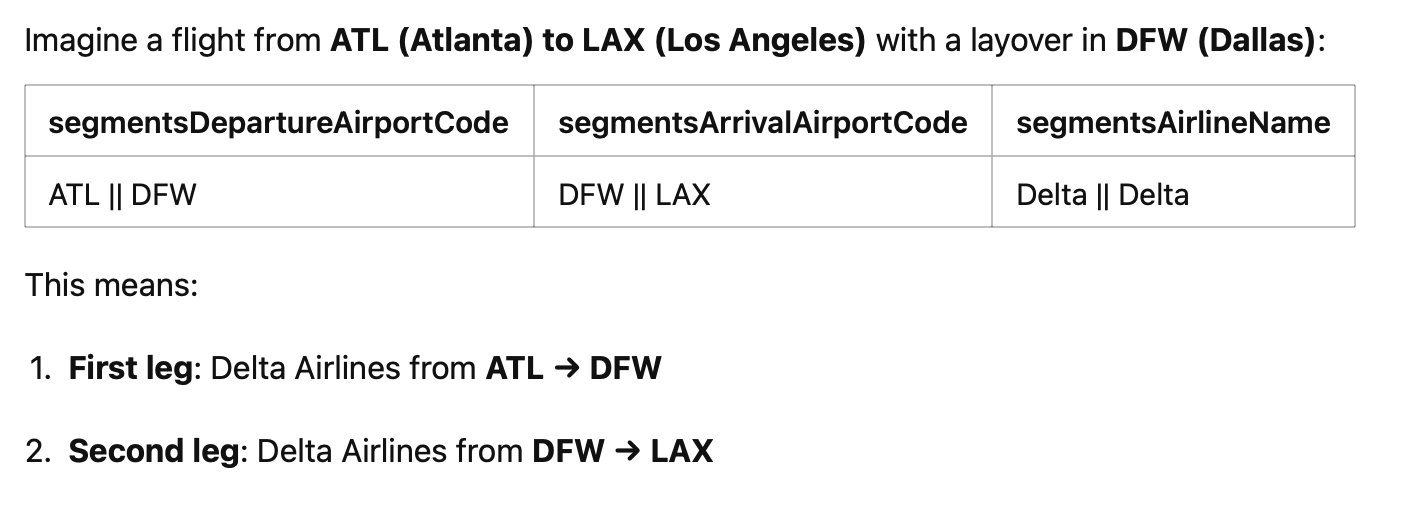

In [175]:
data_dictionary

{'legId': 'An identifier for the flight.',
 'searchDate': 'The date (YYYY-MM-DD) on which this entry was taken from Expedia.',
 'flightDate': 'The date (YYYY-MM-DD) of the flight.',
 'startingAirport': 'Three-character IATA airport code for the initial location.',
 'destinationAirport': 'Three-character IATA airport code for the arrival location.',
 'fareBasisCode': 'The fare basis code.',
 'travelDuration': 'The travel duration in hours and minutes.',
 'elapsedDays': 'The number of elapsed days (usually 0).',
 'isBasicEconomy': 'Boolean for whether the ticket is for basic economy.',
 'isRefundable': 'Boolean for whether the ticket is refundable.',
 'isNonStop': ' Boolean for whether the flight is non-stop.',
 'baseFare': 'The price of the ticket (in USD).',
 'totalFare': 'The price of the ticket (in USD) including taxes and other fees.',
 'seatsRemaining': ' Integer for the number of seats remaining.',
 'totalTravelDistance': 'The total travel distance in miles. This data is sometimes

In [176]:
df.loc[:,['totalFare','segmentsAirlineName']]

,totalFare,segmentsAirlineName
0,248.60,Delta
1,248.60,Delta
2,248.60,Delta
3,248.60,Delta
4,248.60,Delta
...,...,...
1999995,591.61,Delta||Delta
1999996,597.20,Delta||Delta
1999997,797.20,Delta||Delta
1999998,103.60,United


In [177]:
df

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,totalTravelDistance,departure,arrival,route,full_route
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,DL,Airbus A321,8940,947,coach,947,ATL,BOS,ATL->BOS,ATL -> BOS
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,DL,Airbus A321,9000,947,coach,947,ATL,BOS,ATL->BOS,ATL -> BOS
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,DL,Boeing 757-200,9000,947,coach,947,ATL,BOS,ATL->BOS,ATL -> BOS
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,...,DL,Airbus A321,9120,947,coach,947,ATL,BOS,ATL->BOS,ATL -> BOS
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,...,DL,Airbus A321,9240,947,coach,947,ATL,BOS,ATL->BOS,ATL -> BOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,4cf54fe477baef3dda572374daa8d84f,2022-04-21,2022-04-29,ATL,DTW,KA7QA0MQ,PT4H10M,0,False,False,...,DL||DL,Boeing 737-900||Canadair Regional Jet 900,5520||3720,449||161,coach||coach,610,ATL,CMH,ATL->CMH,ATL -> CMH -> CMH -> DTW
1999996,2571238114ce6f22d45a393d9ede68db,2022-04-21,2022-04-29,ATL,DTW,KA7QA0MQ,PT8H42M,0,False,False,...,DL||DL,Boeing 717||Canadair Regional Jet,2880||6660,107||515,coach||coach,622,ATL,CHA,ATL->CHA,ATL -> CHA -> CHA -> DTW
1999997,a57f5864c26f64cb4506f2ce7b824076,2022-04-21,2022-04-29,ATL,DTW,HA7QA0MQ,PT7H28M,0,False,False,...,DL||DL,Airbus A320||Canadair Regional Jet 900,5520||6780,517||527,coach||coach,1044,ATL,ORF,ATL->ORF,ATL -> ORF -> ORF -> DTW
1999998,b6a005fb71cc0f76a643a0a9026b236e,2022-04-21,2022-04-29,ATL,EWR,LAA7AHBN,PT2H19M,0,True,False,...,UA,Boeing 737-700,8340,762,coach,762,ATL,EWR,ATL->EWR,ATL -> EWR


In [ ]:
df.to_csv('final_2million_flight_ticket.csv',index=False) # save the cleaned dataframe

In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv('final_2million_flight_ticket.csv')

In [4]:
# Step 1: Clean and split airline names
df['segmentsAirlineName'] = df['segmentsAirlineName'].str.replace(r'\s*\|\|\s*', '||', regex=True)

In [5]:
df['segmentsAirlineName'] = df['segmentsAirlineName'].apply(lambda x: '||'.join([ i for i in x if i != '']))

## possible answer

In [6]:
len(df.segmentsAirlineName.unique())

99

In [7]:
# Step 5: Explode the list of airline names to split into individual rows (without creating unnecessary duplicates)
# Here, the adjustment is done before the split, so we don't explode and aggregate directly
airline_fare_stats = (
    df.groupby('segmentsAirlineName', observed=True)['totalFare']
    .agg(['mean', 'median','min', 'max', 'count'])
    .sort_values(by='count', ascending=False)
)

airline_fare_stats


,mean,median,min,max,count
segmentsAirlineName,,,,,
A||m||e||r||i||c||a||n|| ||A||i||r||l||i||n||e||s||||||||A||m||e||r||i||c||a||n|| ||A||i||r||l||i||n||e||s,303.488173,277.60,97.10,3155.20,361017
D||e||l||t||a||||||||D||e||l||t||a,378.897656,362.20,53.60,2432.60,294018
U||n||i||t||e||d||||||||U||n||i||t||e||d,369.220848,357.19,62.60,2371.10,267769
A||m||e||r||i||c||a||n|| ||A||i||r||l||i||n||e||s,258.494431,218.60,68.60,4752.60,182337
D||e||l||t||a,249.061124,208.61,38.61,2273.61,120979
...,...,...,...,...,...
D||e||l||t||a||||||||U||n||i||t||e||d||||||||U||n||i||t||e||d||||||||A||l||a||s||k||a|| ||A||i||r||l||i||n||e||s,835.190000,835.19,835.19,835.19,1
C||a||p||e|| ||A||i||r||||||||C||a||p||e|| ||A||i||r||||||||A||l||a||s||k||a|| ||A||i||r||l||i||n||e||s||||||||A||l||a||s||k||a|| ||A||i||r||l||i||n||e||s,568.670000,568.67,568.67,568.67,1
C||a||p||e|| ||A||i||r||||||||C||a||p||e|| ||A||i||r||||||||C||a||p||e|| ||A||i||r||||||||J||e||t||B||l||u||e|| ||A||i||r||w||a||y||s,906.900000,906.90,906.90,906.90,1


i decided to keep those as they are because you cannot split the fare among all of segment airlinenames because , you don't know what each airline company shall get from each fare we have? if you know then tell us, but if you don't know then use the whole segment in your analysis

## possible answer

In [8]:
airline_fare_stats = (
    df[df['isNonStop'] & ~df['isRefundable']]
    .groupby('segmentsAirlineName', observed=True)['totalFare']
    .agg(['mean', 'median','min', 'max', 'count'])
    .sort_values(by='count', ascending=False)
)

airline_fare_stats


,mean,median,min,max,count
segmentsAirlineName,,,,,
A||m||e||r||i||c||a||n|| ||A||i||r||l||i||n||e||s,258.494431,218.60,68.60,4752.60,182337
D||e||l||t||a,249.061124,208.61,38.61,2273.61,120979
U||n||i||t||e||d,289.769952,248.60,38.61,3504.60,113848
J||e||t||B||l||u||e|| ||A||i||r||w||a||y||s,220.713672,192.60,38.61,2023.60,89725
A||l||a||s||k||a|| ||A||i||r||l||i||n||e||s,275.989067,258.60,43.60,1693.60,12684
F||r||o||n||t||i||e||r|| ||A||i||r||l||i||n||e||s,116.225574,111.98,23.97,403.99,2440


## Possible answer

In [9]:
airline_fare_stats = (
    df[df['isBasicEconomy']]
    .groupby('segmentsAirlineName', observed=True)['totalFare']
    .agg(['mean', 'median','min', 'max', 'count'])
    .sort_values(by='count', ascending=False)
)

airline_fare_stats

,mean,median,min,max,count
segmentsAirlineName,,,,,
D||e||l||t||a||||||||D||e||l||t||a,185.871841,178.60,53.60,492.20,54384
D||e||l||t||a,119.324210,118.60,38.61,324.60,33266
U||n||i||t||e||d||||||||U||n||i||t||e||d,187.386592,167.60,62.60,541.60,20354
U||n||i||t||e||d,119.898560,106.60,38.61,265.60,12689
A||m||e||r||i||c||a||n|| ||A||i||r||l||i||n||e||s||||||||A||m||e||r||i||c||a||n|| ||A||i||r||l||i||n||e||s,137.062706,128.60,98.10,297.20,8694
A||m||e||r||i||c||a||n|| ||A||i||r||l||i||n||e||s,122.087930,114.60,90.60,758.60,8513
A||l||a||s||k||a|| ||A||i||r||l||i||n||e||s||||||||A||l||a||s||k||a|| ||A||i||r||l||i||n||e||s,269.707604,269.60,106.60,417.20,7178
D||e||l||t||a||||||||D||e||l||t||a||||||||D||e||l||t||a,281.179414,281.70,132.71,581.30,3139
A||l||a||s||k||a|| ||A||i||r||l||i||n||e||s,129.707819,118.60,43.60,270.60,2558


## possible answer

In [10]:
airline_fare_stats = (
    df[~df['isBasicEconomy']]
    .groupby('segmentsAirlineName', observed=True)['totalFare']
    .agg(['mean', 'median','min', 'max', 'count'])
    .sort_values(by='count', ascending=False)
)

airline_fare_stats

,mean,median,min,max,count
segmentsAirlineName,,,,,
A||m||e||r||i||c||a||n|| ||A||i||r||l||i||n||e||s||||||||A||m||e||r||i||c||a||n|| ||A||i||r||l||i||n||e||s,307.594925,282.10,97.10,3155.20,352323
U||n||i||t||e||d||||||||U||n||i||t||e||d,384.179741,368.60,83.60,2371.10,247415
D||e||l||t||a||||||||D||e||l||t||a,422.704110,401.60,112.60,2432.60,239634
A||m||e||r||i||c||a||n|| ||A||i||r||l||i||n||e||s,265.174915,228.60,68.60,4752.60,173824
S||p||i||r||i||t|| ||A||i||r||l||i||n||e||s||||||||S||p||i||r||i||t|| ||A||i||r||l||i||n||e||s,246.258838,240.58,49.69,826.58,102541
...,...,...,...,...,...
D||e||l||t||a||||||||U||n||i||t||e||d||||||||U||n||i||t||e||d||||||||A||l||a||s||k||a|| ||A||i||r||l||i||n||e||s,835.190000,835.19,835.19,835.19,1
C||a||p||e|| ||A||i||r||||||||C||a||p||e|| ||A||i||r||||||||A||l||a||s||k||a|| ||A||i||r||l||i||n||e||s||||||||A||l||a||s||k||a|| ||A||i||r||l||i||n||e||s,568.670000,568.67,568.67,568.67,1
C||a||p||e|| ||A||i||r||||||||C||a||p||e|| ||A||i||r||||||||C||a||p||e|| ||A||i||r||||||||J||e||t||B||l||u||e|| ||A||i||r||w||a||y||s,906.900000,906.90,906.90,906.90,1


In [11]:
data_dictionary

NameError: name 'data_dictionary' is not defined

In [ ]:
df = df.reset_index()

#### IGNORE THIS

In [12]:
df['segmentsDepartureTimeRaw'].iloc[1952076]

'2022-04-29T14:00:00.000-04:00||2022-04-29T17:05:00.000-04:00'

In [37]:
# Plot a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(matches_df.corr(numeric_only=True), annot=True);

NameError: name 'plt' is not defined

In [ ]:
columns_2_see = ["home_score", "home_xg",  "away_xg", "away_penalty", "Host" ] # "home_penalty", "away_score",
sns.pairplot(
    matches_df[columns_2_see], hue="Host")
plt.show()

In [ ]:
plt.scatter(matches_df["home_score"],matches_df["away_penalty"])
